In [1]:
import numpy as py
import pandas as pd

df1 = pd.read_csv('kc1.csv')

# '?' problem
for df in [df1]:
    df.replace('?', py.nan, inplace=True)
    df.dropna(inplace=True)
    df[df.columns] = df[df.columns].apply(pd.to_numeric)

df1['defects'] = df1['defects'].astype(int)


In [2]:
print(f"Dataset Shape: {df1.shape}")
df1.head(5)
# Data Exploration df1
print("\nBasic Statistics:")
print(df1.describe())

print("\nMissing Values:")
print(df1.isnull().sum())

print("\nClass Distribution:")
print(df1['defects'].value_counts())

Dataset Shape: (2109, 22)

Basic Statistics:
               loc         v(g)        ev(g)        iv(g)            n  \
count  2109.000000  2109.000000  2109.000000  2109.000000  2109.000000   
mean     20.372262     2.838028     1.674443     2.546420    49.829445   
std      29.754442     3.900763     2.200659     3.375859    83.599874   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       3.000000     1.000000     1.000000     1.000000     4.000000   
50%       9.000000     1.000000     1.000000     1.000000    16.000000   
75%      24.000000     3.000000     1.000000     3.000000    58.000000   
max     288.000000    45.000000    26.000000    45.000000  1106.000000   

                 v            l            d            i              e  ...  \
count  2109.000000  2109.000000  2109.000000  2109.000000    2109.000000  ...   
mean    258.696719     0.319583     6.771242    21.240071    5242.386240  ...   
std     516.317605     0.317029     7.863646 

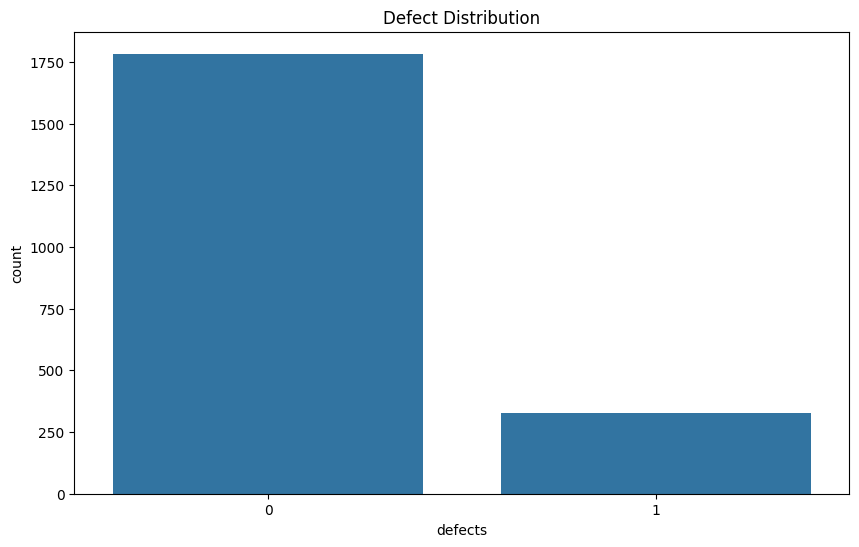

In [3]:
# Data Visualization df1
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='defects', data=df1)
plt.title('Defect Distribution')
plt.show()

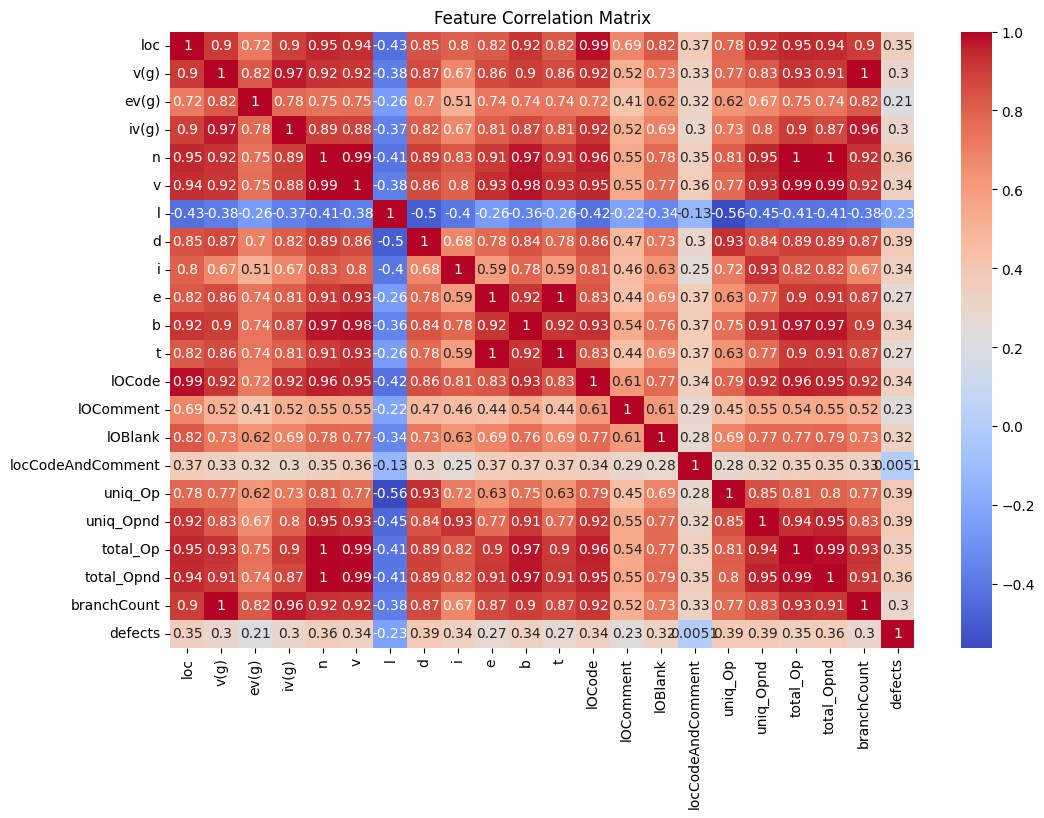

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
print("\n Information on CM1.csv: ")
df1.info()


 Information on CM1.csv: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                2109 non-null   float64
 1   v(g)               2109 non-null   float64
 2   ev(g)              2109 non-null   float64
 3   iv(g)              2109 non-null   float64
 4   n                  2109 non-null   float64
 5   v                  2109 non-null   float64
 6   l                  2109 non-null   float64
 7   d                  2109 non-null   float64
 8   i                  2109 non-null   float64
 9   e                  2109 non-null   float64
 10  b                  2109 non-null   float64
 11  t                  2109 non-null   float64
 12  lOCode             2109 non-null   int64  
 13  lOComment          2109 non-null   int64  
 14  lOBlank            2109 non-null   int64  
 15  locCodeAndComment  2109 non-null   int64  
 1

## After Using SMOTE ##

In [6]:
from imblearn.over_sampling import SMOTE

#applying smote
def apply_smote(df):
    X = df.drop('defects', axis=1)
    y = df['defects']
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    df_res = pd.DataFrame(X_res, columns=X.columns)
    df_res['defects'] = y_res
    return df_res

# Apply SMOTE to each dataset
data_bal = apply_smote(df1)

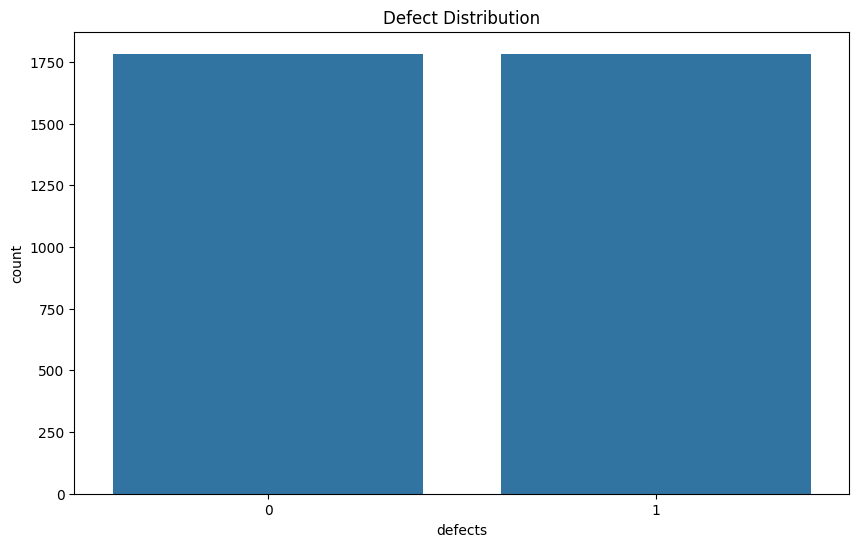

In [7]:
# Data Visualization df1
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='defects', data=data_bal)
plt.title('Defect Distribution')
plt.show()

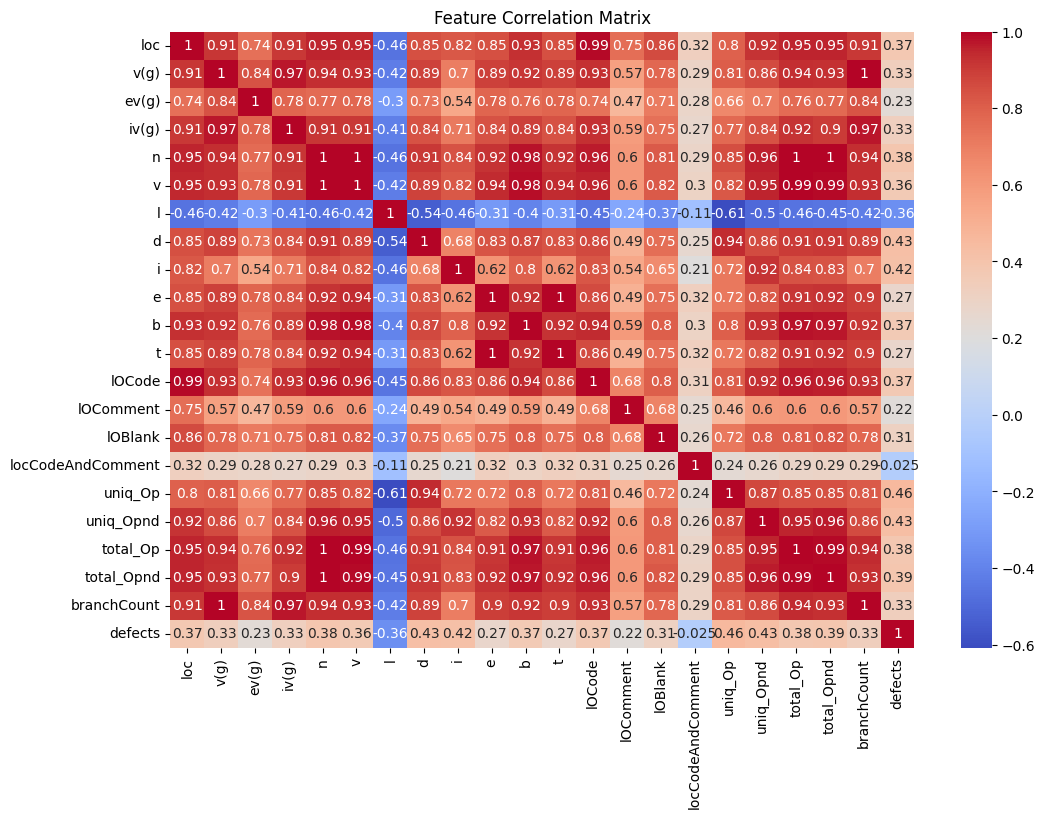

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data_bal.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [9]:
print("\n Information on SMOTED kc1.csv: ")
data_bal.info()


 Information on SMOTED kc1.csv: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                3566 non-null   float64
 1   v(g)               3566 non-null   float64
 2   ev(g)              3566 non-null   float64
 3   iv(g)              3566 non-null   float64
 4   n                  3566 non-null   float64
 5   v                  3566 non-null   float64
 6   l                  3566 non-null   float64
 7   d                  3566 non-null   float64
 8   i                  3566 non-null   float64
 9   e                  3566 non-null   float64
 10  b                  3566 non-null   float64
 11  t                  3566 non-null   float64
 12  lOCode             3566 non-null   int64  
 13  lOComment          3566 non-null   int64  
 14  lOBlank            3566 non-null   int64  
 15  locCodeAndComment  3566 non-null   int

In [10]:
data_bal.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,...,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.00000
mean,30.115740,3.932656,2.101970,3.467816,77.594609,422.624876,0.251233,9.572587,28.160152,9599.925383,...,22.138811,1.519069,2.770611,0.116096,9.679043,13.970518,47.917808,29.678959,6.872980,0.50000
std,37.824177,4.812278,2.691289,4.131239,105.133695,660.763068,0.281115,9.577839,24.173239,23201.482134,...,30.123506,4.057172,4.975405,0.616723,6.539624,14.991763,64.772047,40.615861,9.649779,0.50007
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,5.000000,1.000000,1.000000,1.000000,7.000000,19.650000,0.060000,2.478282,8.000000,49.130000,...,2.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,2.445076,1.000000,0.00000
50%,16.000000,2.000000,1.000000,2.000000,33.197520,136.646646,0.135889,6.277711,21.612906,933.331026,...,10.000000,0.000000,1.000000,0.000000,8.239373,9.000000,21.000000,12.844839,3.000000,0.50000
75%,39.709181,5.000000,1.481080,4.000000,104.000000,523.641616,0.339972,14.307886,41.359952,7307.973652,...,31.000000,1.000000,3.000000,0.000000,13.895291,20.000000,63.944646,39.161368,9.000000,1.00000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000,1.00000
